In [1]:
import os 
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import PIL
import pathlib

2022-08-25 14:17:07.731619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/amadon/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-08-25 14:17:07.732000: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
BATCH_SIZE = 32
IMG_SIZE = (100, 100)
INPUT_SHAPE = (100, 100, 3)

train_dir = pathlib.Path('data_dir/train/')
test_dir = pathlib.Path('data_dir/test/')
val_dir = pathlib.Path('data_dir/valid/')

category = []
for folder in os.listdir(train_dir):
    category.append(folder)
    
num_classes = len(category)

In [3]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
    )
test_datagen=ImageDataGenerator(rescale=1./255)

# InceptionV3 Model

In [4]:
train_dataset = test_datagen.flow_from_directory(train_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE)

Found 9285 images belonging to 75 classes.


In [5]:
test_dataset = test_datagen.flow_from_directory(test_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE)

Found 375 images belonging to 75 classes.


In [6]:
val_dataset = test_datagen.flow_from_directory(val_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE)

Found 375 images belonging to 75 classes.


In [7]:
incepbase_model = InceptionV3(
    weights = "imagenet",
    include_top=False, 
    input_shape = INPUT_SHAPE
    ) 

2022-08-25 14:17:15.612819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/amadon/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-08-25 14:17:15.613342: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-25 14:17:15.613573: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amadon-virtual-machine): /proc/driver/nvidia/version does not exist
2022-08-25 14:17:15.614204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
incepbase_model.trainable = False

In [9]:
incepbase_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 10, 10, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 10, 10, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 10, 10, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 10, 10, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 10, 10, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 10, 10, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 4, 4, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 4, 4, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 4, 4, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 4, 4, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 4, 4, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 4, 4, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 4, 4, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 4, 4, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 4, 4, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 4, 4, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [10]:
model = incepbase_model
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation="softmax")(x)   

incep_model = tf.keras.Model(
    inputs = model.input, 
    outputs = predictions)

incep_model.compile(loss='categorical_crossentropy', 
                       optimizer=tf.keras.optimizers.Adam(), 
                       metrics=['accuracy'])  

In [11]:
incep_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 10, 10, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 10, 10, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 10, 10, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 10, 10, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 10, 10, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 10, 10, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 4, 4, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 4, 4, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 4, 4, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 4, 4, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 4, 4, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 4, 4, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 4, 4, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 4, 4, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 4, 4, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 4, 4, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [12]:
initial_epochs = 10

simpleincep_history = incep_model.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=val_dataset,
    verbose=1,
)

Epoch 1/10
291/291 [==============================] - 54s 165ms/step - loss: 2.5091 - accuracy: 0.3905 - val_loss: 1.5543 - val_accuracy: 0.5840
Epoch 2/10
291/291 [==============================] - 40s 137ms/step - loss: 1.1809 - accuracy: 0.6827 - val_loss: 1.3451 - val_accuracy: 0.6240
Epoch 3/10
291/291 [==============================] - 38s 130ms/step - loss: 0.7875 - accuracy: 0.7805 - val_loss: 1.2043 - val_accuracy: 0.6587
Epoch 4/10
291/291 [==============================] - 36s 124ms/step - loss: 0.5584 - accuracy: 0.8450 - val_loss: 1.3215 - val_accuracy: 0.6347
Epoch 5/10
291/291 [==============================] - 38s 130ms/step - loss: 0.3951 - accuracy: 0.8931 - val_loss: 1.2545 - val_accuracy: 0.6667
Epoch 6/10
291/291 [==============================] - 37s 127ms/step - loss: 0.2569 - accuracy: 0.9334 - val_loss: 1.3407 - val_accuracy: 0.6880
Epoch 7/10
291/291 [==============================] - 40s 138ms/step - loss: 0.1707 - accuracy: 0.9614 - val_loss: 1.3116 - val_ac

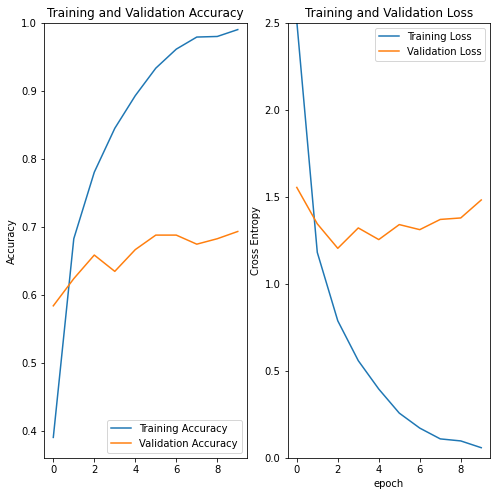

In [13]:
acc = simpleincep_history.history['accuracy']
val_acc = simpleincep_history.history['val_accuracy']

loss = simpleincep_history.history['loss']
val_loss = simpleincep_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
print("[INFO] Calculating model accuracy")
scores = incep_model.evaluate(test_dataset)
print(f"Test Accuracy: {scores[1]*100}%")

[INFO] Calculating model accuracy
12/12 [==============================] - 2s 141ms/step - loss: 1.2192 - accuracy: 0.7067
Test Accuracy: 70.6666648387909%


1/1 [==============================] - 1s 1s/step
This image most likely belongs to BLACK HAIRSTREAK with a 121.92 percent confidence.
BLACK HAIRSTREAK


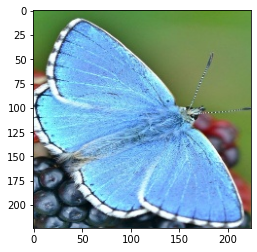

In [15]:
classes=list(train_dataset.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    x = tf.keras.utils.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'data_dir/6 images/4.jpg'
result_baseincep= incep_model.predict([prepare(img_url)])
butterfly=tf.keras.utils.load_img(img_url)
plt.imshow(butterfly)

classresult=np.argmax(result_baseincep,axis=1)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[classresult[0]], 100 * np.max(scores))
)
print(classes[classresult[0]])

In [16]:
incep_model.save('simpleincep_model.h5')

In [17]:
train_dataset = test_datagen.flow_from_directory(train_dir,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE)

Found 9285 images belonging to 75 classes.


In [18]:
inputs = tf.keras.Input(shape=INPUT_SHAPE)
x = incepbase_model(inputs, training=False)
x = layers.Dropout(0.4)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(num_classes, activation="softmax")(x)   

augincep_model = tf.keras.Model(
    inputs, 
    outputs = predictions)

base_learning_rate = 0.0005

augincep_model.compile(loss='categorical_crossentropy', 
                       optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), 
                       metrics=['accuracy'])  

In [19]:
augincep_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 1, 1, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                                 
Total params: 22,346,603
Trainable params: 543,819
Non-trai

In [20]:
augincep_history = augincep_model.fit(
    train_dataset,
    epochs=initial_epochs,
    validation_data=val_dataset,
    verbose=1,
)

Epoch 1/10
291/291 [==============================] - 43s 135ms/step - loss: 3.4418 - accuracy: 0.2076 - val_loss: 1.9940 - val_accuracy: 0.4827
Epoch 2/10
291/291 [==============================] - 38s 129ms/step - loss: 1.9062 - accuracy: 0.5078 - val_loss: 1.5191 - val_accuracy: 0.5920
Epoch 3/10
291/291 [==============================] - 38s 131ms/step - loss: 1.4604 - accuracy: 0.6130 - val_loss: 1.3511 - val_accuracy: 0.6480
Epoch 4/10
291/291 [==============================] - 39s 134ms/step - loss: 1.2326 - accuracy: 0.6603 - val_loss: 1.3101 - val_accuracy: 0.6320
Epoch 5/10
291/291 [==============================] - 38s 132ms/step - loss: 1.0541 - accuracy: 0.7036 - val_loss: 1.3112 - val_accuracy: 0.6587
Epoch 6/10
291/291 [==============================] - 39s 133ms/step - loss: 0.9623 - accuracy: 0.7285 - val_loss: 1.2510 - val_accuracy: 0.6827
Epoch 7/10
291/291 [==============================] - 37s 127ms/step - loss: 0.8597 - accuracy: 0.7563 - val_loss: 1.1786 - val_ac

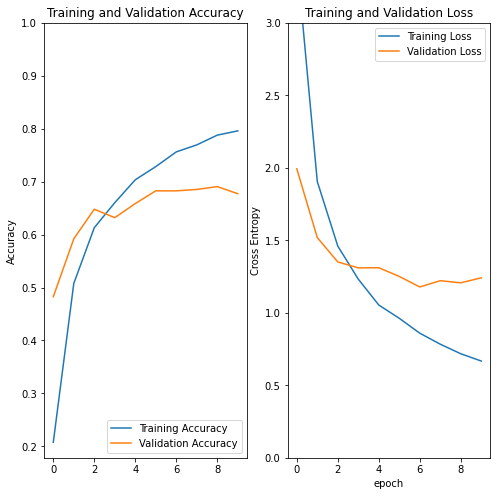

In [21]:
acc = augincep_history.history['accuracy']
val_acc = augincep_history.history['val_accuracy']

loss = augincep_history.history['loss']
val_loss = augincep_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [22]:
print("[INFO] Calculating model accuracy")
scores = augincep_model.evaluate(test_dataset)
print(f"Test Accuracy: {scores[1]*100}%")

[INFO] Calculating model accuracy
12/12 [==============================] - 2s 124ms/step - loss: 1.0489 - accuracy: 0.7147
Test Accuracy: 71.46666646003723%


1/1 [==============================] - 1s 1s/step
This image most likely belongs to BLACK HAIRSTREAK with a 104.89 percent confidence.
BLACK HAIRSTREAK


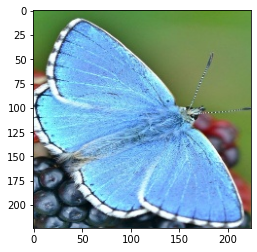

In [23]:
classes=list(train_dataset.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    x = tf.keras.utils.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'data_dir/6 images/4.jpg'
result_augincep= augincep_model.predict([prepare(img_url)])
butterfly=tf.keras.utils.load_img(img_url)
plt.imshow(butterfly)

classresult=np.argmax(result_augincep,axis=1)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[classresult[0]], 100 * np.max(scores))
)
print(classes[classresult[0]])

In [24]:
augincep_model.save('augincep_model.h5')

In [25]:
incepbase_model.trainable = True

In [26]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(incepbase_model.layers))

Number of layers in the base model:  311


In [27]:
# Fine-tune from this layer onwards
fine_tune_at = 250

# Freeze all the layers before the `fine_tune_at` layer
for layer in incepbase_model.layers[:fine_tune_at]:
  layer.trainable = False

In [28]:
augincep_model.compile(loss='categorical_crossentropy', 
                       optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10), 
                       metrics=['accuracy'])  

augincep_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 1, 1, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 75)                19275     
                                                                 
Total params: 22,346,603
Trainable params: 11,085,259
Non-t

In [30]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

tunedincep_history = augincep_model.fit(
    train_dataset,
    epochs=total_epochs,
    initial_epoch=augincep_history.epoch[-1],
    validation_data=val_dataset,
    verbose=1
)

Epoch 10/20
291/291 [==============================] - 113s 376ms/step - loss: 0.5723 - accuracy: 0.8295 - val_loss: 0.9672 - val_accuracy: 0.7413
Epoch 11/20
291/291 [==============================] - 108s 370ms/step - loss: 0.3086 - accuracy: 0.9039 - val_loss: 1.0117 - val_accuracy: 0.7387
Epoch 12/20
291/291 [==============================] - 108s 372ms/step - loss: 0.1928 - accuracy: 0.9401 - val_loss: 1.0173 - val_accuracy: 0.7387
Epoch 13/20
291/291 [==============================] - 108s 371ms/step - loss: 0.1228 - accuracy: 0.9618 - val_loss: 0.9456 - val_accuracy: 0.7627
Epoch 14/20
291/291 [==============================] - 108s 371ms/step - loss: 0.0923 - accuracy: 0.9703 - val_loss: 1.0254 - val_accuracy: 0.7573
Epoch 15/20
291/291 [==============================] - 107s 368ms/step - loss: 0.0723 - accuracy: 0.9782 - val_loss: 1.0024 - val_accuracy: 0.7733
Epoch 16/20
291/291 [==============================] - 108s 371ms/step - loss: 0.0586 - accuracy: 0.9831 - val_loss: 1

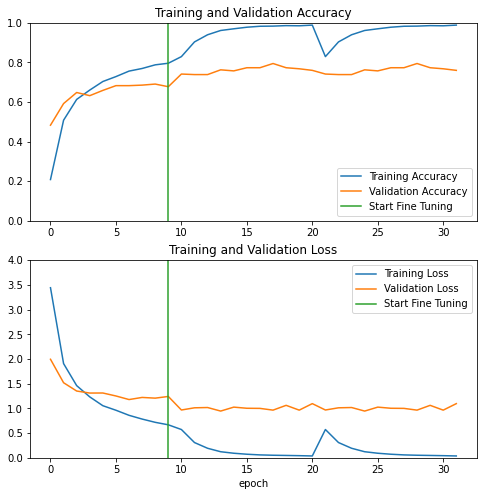

In [35]:
acc += tunedincep_history.history['accuracy']
val_acc += tunedincep_history.history['val_accuracy']

loss += tunedincep_history.history['loss']
val_loss += tunedincep_history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 4.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [32]:
print("[INFO] Calculating model accuracy")
scores = augincep_model.evaluate(test_dataset)
print(f"Test Accuracy: {scores[1]*100}%")

[INFO] Calculating model accuracy
12/12 [==============================] - 2s 123ms/step - loss: 0.9461 - accuracy: 0.8160
Test Accuracy: 81.5999984741211%


1/1 [==============================] - 1s 857ms/step
This image most likely belongs to ADONIS with a 94.61 percent confidence.


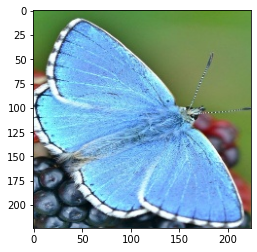

In [33]:
classes=list(train_dataset.class_indices.keys())
# Pre-Processing test data same as train data.
def prepare(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
    x = tf.keras.utils.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img_url=r'data_dir/6 images/4.jpg'
result_baseincep= augincep_model.predict([prepare(img_url)])
butterfly=tf.keras.utils.load_img(img_url)
plt.imshow(butterfly)

classresult=np.argmax(result_baseincep,axis=1)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(classes[classresult[0]], 100 * np.max(scores))
)


In [36]:
augincep_model.save('tunedincep_model.h5')